# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

# #         Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']      
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | yusva
City not found. Skipping...
Processing Record 4 of Set 1 | berlevag
Processing Record 5 of Set 1 | malwan
City not found. Skipping...
Processing Record 6 of Set 1 | acarau
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | gopalpur
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | newtownards
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | biak
Processing Record 13 of Set 1 | kumta
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | ariquemes
Processing Record 22 of Set 1 | puerto d

Processing Record 38 of Set 4 | jamestown
Processing Record 39 of Set 4 | bani walid
Processing Record 40 of Set 4 | lethem
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | lasa
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | oxford
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | road town
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | yoichi
Processing Record 49 of Set 4 | kapaa
Processing Record 0 of Set 5 | nemuro
Processing Record 1 of Set 5 | sabha
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | sechura
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | cortes
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | puerto escondido
Processing Record 10 of Set 5 | oudtshoorn
Processing Record 11 of Set 5 

Processing Record 29 of Set 8 | villazon
Processing Record 30 of Set 8 | amapa
Processing Record 31 of Set 8 | cap-aux-meules
Processing Record 32 of Set 8 | xuddur
Processing Record 33 of Set 8 | iwanai
Processing Record 34 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 35 of Set 8 | osakarovka
Processing Record 36 of Set 8 | winona
Processing Record 37 of Set 8 | liepaja
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | farah
Processing Record 40 of Set 8 | susangerd
Processing Record 41 of Set 8 | kysyl-syr
Processing Record 42 of Set 8 | turukhansk
Processing Record 43 of Set 8 | san luis
Processing Record 44 of Set 8 | nelson bay
Processing Record 45 of Set 8 | jiazi
Processing Record 46 of Set 8 | ketchikan
Processing Record 47 of Set 8 | manono
Processing Record 48 of Set 8 | djibo
Processing Record 49 of Set 8 | skibbereen
Processing Record 0 of Set 9 | katobu
Processing Record 1 of Set 9 | lazaro cardenas
Processing Record 2 of Set 9 

Processing Record 15 of Set 12 | cordoba
Processing Record 16 of Set 12 | saint-georges
Processing Record 17 of Set 12 | aykino
Processing Record 18 of Set 12 | westpunt
City not found. Skipping...
Processing Record 19 of Set 12 | shetpe
Processing Record 20 of Set 12 | manta
Processing Record 21 of Set 12 | mae ramat
Processing Record 22 of Set 12 | luderitz
Processing Record 23 of Set 12 | tarudant
City not found. Skipping...
Processing Record 24 of Set 12 | barawe
City not found. Skipping...
Processing Record 25 of Set 12 | buluang
Processing Record 26 of Set 12 | pasighat
Processing Record 27 of Set 12 | bogo
Processing Record 28 of Set 12 | punta gorda
Processing Record 29 of Set 12 | kamenka
Processing Record 30 of Set 12 | nhulunbuy
Processing Record 31 of Set 12 | padang
Processing Record 32 of Set 12 | igrim
Processing Record 33 of Set 12 | phan thiet
Processing Record 34 of Set 12 | rundu
Processing Record 35 of Set 12 | salta
Processing Record 36 of Set 12 | erenhot
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,15.60,81,97,7.41,MX,1675650385
1,port macquarie,-31.4333,152.9167,29.38,57,1,5.59,AU,1675650646
2,berlevag,70.8578,29.0864,4.00,81,100,14.92,NO,1675650646
3,acarau,-2.8856,-40.1200,25.07,88,41,3.44,BR,1675650647
4,rikitea,-23.1203,-134.9692,26.04,76,2,6.82,PF,1675650647


In [6]:
city_data_df['Country'].value_counts()

RU    75
US    57
BR    30
CA    26
AU    24
      ..
LV     1
RO     1
BB     1
MN     1
AF     1
Name: Country, Length: 118, dtype: int64

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,15.60,81,97,7.41,MX,1675650385
1,port macquarie,-31.4333,152.9167,29.38,57,1,5.59,AU,1675650646
2,berlevag,70.8578,29.0864,4.00,81,100,14.92,NO,1675650646
3,acarau,-2.8856,-40.1200,25.07,88,41,3.44,BR,1675650647
4,rikitea,-23.1203,-134.9692,26.04,76,2,6.82,PF,1675650647


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

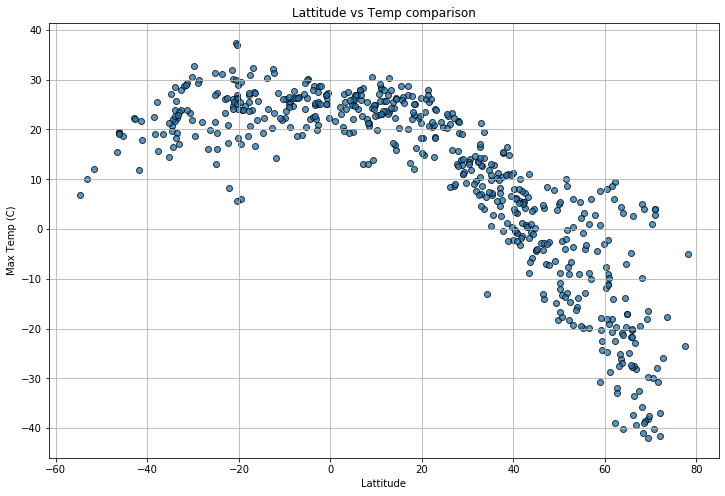

In [9]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df['Lat']
y_values = city_data_df['Max Temp']

fig1, ax1 = plt.subplots(figsize= (12,8))
plt.scatter(x_values,y_values,alpha=.75,edgecolor='black',marker="o")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (C)")
plt.title("Lattitude vs Temp comparison")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

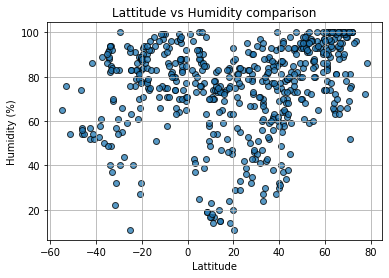

In [10]:
# Build the scatter plots for latitude vs. humidity
y2_values = city_data_df['Humidity']

plt.scatter(x_values,y2_values,alpha=.75,edgecolor='black',marker="o")


# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("Lattitude vs Humidity comparison")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

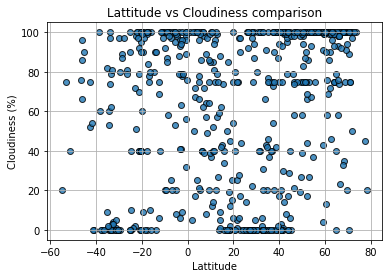

In [11]:
# Build the scatter plots for latitude vs. cloudiness
y3_values = city_data_df['Cloudiness']

plt.scatter(x_values,y3_values,alpha=.8,edgecolor='black',marker="o")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("Lattitude vs Cloudiness comparison")

plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

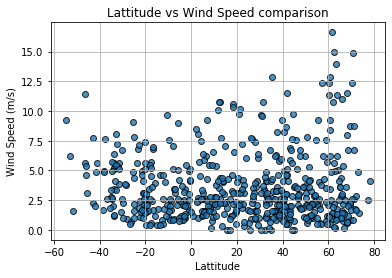

In [12]:
# Build the scatter plots for latitude vs. wind speed
y4_values = city_data_df['Wind Speed']

plt.scatter(x_values,y4_values,alpha=.8,edgecolor='black',marker="o")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Lattitude vs Wind Speed comparison")

plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
import scipy.stats as st

# Define a function to create Linear Regression plots
def linregressionplot (x_values,y_values,x_label,y_label,hemisphere,line_placement,ylim=None):
#Defining linear regression values
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    regress_values = x_values*slope + intercept
    lin_eq = f"y = {round(slope,2)} x+ {round(intercept,2)}"
#     Setting up scatter
    plt.scatter(x_values,y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0,ylim)
    plt.title(f"{hemisphere} Hemisphere: {x_label} vs {y_label}")
    plt.annotate(lin_eq,line_placement,fontsize=15,color="r")
    plt.grid()
#     Printing R Sq-values
    print(f"The r-value is: {round(rvalue,2)}")
    return plt.plot(x_values,regress_values,"r-")
    
    

In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi= city_data_df[(city_data_df["Lat"] >= 0)]
northern_hemi_df= northern_hemi.reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,15.60,81,97,7.41,MX,1675650385
1,berlevag,70.8578,29.0864,4.00,81,100,14.92,NO,1675650646
2,gopalpur,19.2667,84.9167,22.39,47,25,1.38,IN,1675650647
3,talnakh,69.4865,88.3972,-16.55,98,100,0.83,RU,1675650633
4,newtownards,54.5924,-5.6909,5.41,87,100,2.57,GB,1675650648


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi= city_data_df[(city_data_df["Lat"] < 0)]
southern_hemi_df= southern_hemi.reset_index(drop=True)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port macquarie,-31.4333,152.9167,29.38,57,1,5.59,AU,1675650646
1,acarau,-2.8856,-40.1200,25.07,88,41,3.44,BR,1675650647
2,rikitea,-23.1203,-134.9692,26.04,76,2,6.82,PF,1675650647
3,biak,-0.9131,122.8766,26.85,69,89,1.66,ID,1675650392
4,vaini,-21.2000,-175.2000,30.09,70,40,3.09,TO,1675650650


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.88


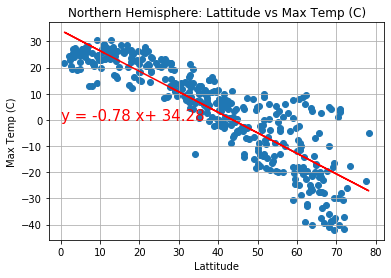

In [90]:
# Linear regression on Northern Hemisphere


x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']

linregressionplot(x_values,y_values,"Lattitude","Max Temp (C)","Northern",(0,0))

The r-value is: 0.37


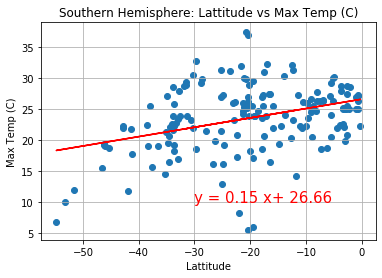

In [92]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']

linregressionplot(x_values,y_values,"Lattitude","Max Temp (C)","Southern",(-30,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44


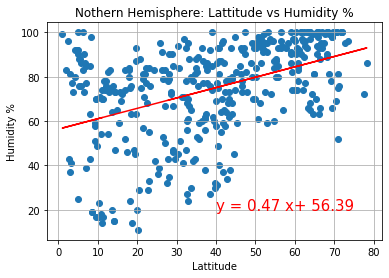

In [93]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Humidity']

linregressionplot(x_values,y_values,"Lattitude","Humidity %","Nothern",(40,20))

The r-value is: 0.36


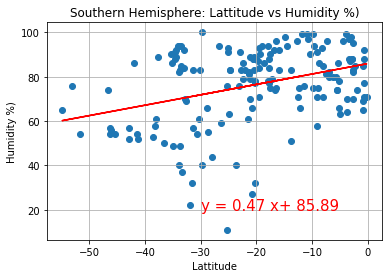

In [94]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']

linregressionplot(x_values,y_values,"Lattitude","Humidity %)","Southern",(-30,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.31


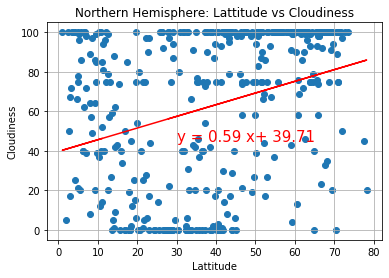

In [95]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']

linregressionplot(x_values,y_values,"Lattitude","Cloudiness","Northern",(30,45))

The r-value is: 0.31


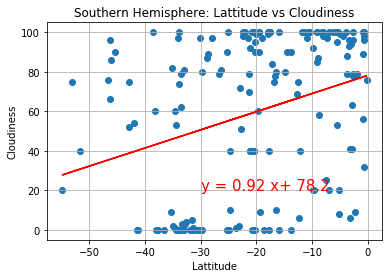

In [96]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']

linregressionplot(x_values,y_values,"Lattitude","Cloudiness","Southern",(-30,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06


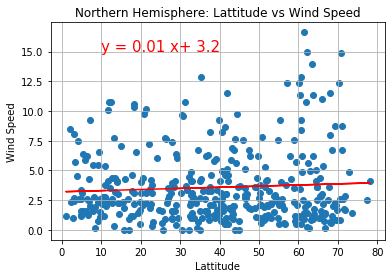

In [98]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']

linregressionplot(x_values,y_values,"Lattitude","Wind Speed","Northern",(10,15))

The r-value is: -0.31


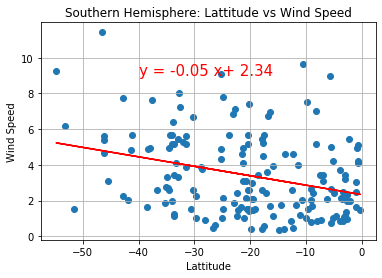

In [101]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']

linregressionplot(x_values,y_values,"Lattitude","Wind Speed","Southern",(-40,9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE